## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pylab as plt
# import matplotlib as plt

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")

cols = list(df.columns)
cols
for col in range(len(cols)):
    cols[col] = cols[col].lower()

    
cols_dict = dict()
for col in range(len(df.columns)):
    cols_dict[df.columns[col]] = cols[col]
    

    

df = df.rename(columns=cols_dict)


df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [3]:
# ваш код здесь
df = df.drop('state', axis=1)
df['voice mail plan'] = df['voice mail plan'].apply(lambda x: 0 if x == 'No' else 1)
df['international plan'] = df['international plan'].apply(lambda x: 0 if x == 'No' else 1)
# ваш код здесь
df['churn'] = df['churn'].astype(int)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [4]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
from sklearn.preprocessing import StandardScaler


cols_to_scale = []
for col in df.columns:
    counts = df[col].value_counts()
    if list(counts.keys()) == [0,1] or list(counts.keys()) == [1,0]:
        continue
    cols_to_scale.append(col)

        

In [6]:
#скалируем
def scaler_default(df2):
    cols_to_scale = []


    cols_obj = []
    for col in df2.columns:
        if col == 'target':
            continue
        if '_' in col:
            continue
        if df2[col].dtype != 'object':
            cols_to_scale.append(col)
    col_names = cols_to_scale.copy()

    for i in range(len(col_names)):
        col_names[i] = col_names[i] + '_scaled'

    scaler2 = StandardScaler()
    df_scaled = scaler2.fit_transform(df2[cols_to_scale])
    df2[col_names] = pd.DataFrame.from_records(df_scaled, columns=col_names)
    df2 = df2.drop(cols_to_scale, axis=1)
    return df2

In [7]:
#скалируем
def scaler(df2, cols_to_scale):
    
   
    col_names = cols_to_scale.copy()

    for i in range(len(col_names)):
        col_names[i] = col_names[i] + '_scaled'

    scaler2 = StandardScaler()
    df_scaled = scaler2.fit_transform(df2[cols_to_scale])
    df2[col_names] = pd.DataFrame.from_records(df_scaled, columns=col_names)
    df2 = df2.drop(cols_to_scale, axis=1)
    return df2


In [8]:
df = scaler(df, cols_to_scale)

Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [9]:
# ваш код здесь
x = df.drop('churn', axis=1)
y = df.churn

Проверьте баланс классов. Является ли выборка сбалансированной?

In [10]:
# ваш код здесь
y.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

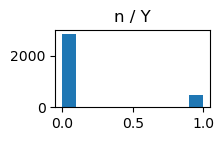

In [11]:
plt.figure(figsize=(2,1))
plt.hist(df.churn)
plt.title('n / Y')
plt.show()

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [12]:
from sklearn.model_selection import train_test_split

# ваш код здесь
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [13]:
# done before x/y split

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [14]:

# - - -- - -- - -- 

In [15]:
# ваш код здесь

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [17]:
logr = LogisticRegression()
svc = SVC(kernel='linear', probability=True)
# svr = SVR(kernel='linear')

models = [
    logr,
    svc,
#     svr,
]

for model in models:
    model.fit(x_train, y_train)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [18]:
from sklearn.metrics import roc_auc_score

In [19]:
preds = dict()
scores = dict()
for model in models:
    preds[model] = model.predict_proba(x_test)[ : , 1 ]
    scores[str(model)] = roc_auc_score(y_test, preds[model])
scores
# preds

# ваш код здесь

{'LogisticRegression()': 0.8277125441652863,
 "SVC(kernel='linear', probability=True)": 0.755856745354995}

Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
preds = tree.predict_proba(x_test)[:,1]
scores[str(tree)] = roc_auc_score(y_test, preds)
scores

# ваш код здесь

{'LogisticRegression()': 0.8277125441652863,
 "SVC(kernel='linear', probability=True)": 0.755856745354995,
 'DecisionTreeClassifier()': 0.8309724114858305}

Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [22]:

df2 = pd.read_csv("telecom_churn.csv")

cols = list(df2.columns)
cols
for col in range(len(cols)):
    cols[col] = cols[col].lower()

    
cols_dict = dict()
for col in range(len(df2.columns)):
    cols_dict[df2.columns[col]] = cols[col]
        

df2 = df2.rename(columns=cols_dict)
df2 = df2.drop('state', axis=1)
df2['voice mail plan'] = df2['voice mail plan'].apply(lambda x: 0 if x == 'No' else 1)
df2['international plan'] = df2['international plan'].apply(lambda x: 0 if x == 'No' else 1)
# ваш код здесь
df2['churn'] = df2['churn'].astype(int)
x2 = df2.drop('churn', axis=1)
y2 = df2.churn
x_train_unscaled, x_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(x2,y2,test_size=0.3, random_state=42)


In [23]:
usncaled_tree = DecisionTreeClassifier()
usncaled_tree.fit(x_train_unscaled, y_train_unscaled)
preds = usncaled_tree.predict_proba(x_test_unscaled)[:,1]
scores['unscaled_'+str(usncaled_tree)] = roc_auc_score(y_test_unscaled, preds)
scores

# ваш код здесь

{'LogisticRegression()': 0.8277125441652863,
 "SVC(kernel='linear', probability=True)": 0.755856745354995,
 'DecisionTreeClassifier()': 0.8309724114858305,
 'unscaled_DecisionTreeClassifier()': 0.8315517621235241}

Какой вывод про масштабирование признаков для обучения дерева можно сделать?

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [24]:
models.append(tree)

In [25]:
models

[LogisticRegression(),
 SVC(kernel='linear', probability=True),
 DecisionTreeClassifier()]

In [26]:
from sklearn.model_selection import GridSearchCV

best_params = dict()
params = {str(models[2]):
          { 
    'max_depth' : np.arange(1, 11, 1),
    'criterion': ['gini', 'entropy'],
            },
          
          str(models[1]):
          {
             'C' : np.arange(0.1, 10, 0.5),
          },
          
          str(models[0]):
          {
             'C' : np.arange(0.1, 10, 0.5),
          }
}

for model in models:
    
    gs = GridSearchCV(model, params[str(model)], cv=5, scoring='roc_auc')
    gs.fit(x_train, y_train)
    print('current model:', model)
    print('best score:', gs.best_score_)
    best_params[str(model)] = gs.best_params_
    print('best params:', best_params[str(model)])
    
# ваш код здесь

current model: LogisticRegression()
best score: 0.80263089366929
best params: {'C': 9.1}
current model: SVC(kernel='linear', probability=True)
best score: 0.7625459228917698
best params: {'C': 0.1}
current model: DecisionTreeClassifier()
best score: 0.8767676562822961
best params: {'criterion': 'gini', 'max_depth': 5}


In [27]:
logr_tuned = LogisticRegression(C= 9.1)
svc_tuned = SVC(kernel='linear', probability=True, C=0.1)
tree_tuned = DecisionTreeClassifier(criterion='gini', max_depth=5)

models_new = [
    logr_tuned,
    svc_tuned,
    tree_tuned,
]

for model in models_new:
    model.fit(x_train, y_train)
    
for model in models_new:
    models.append(model)

In [28]:
preds = dict()
for model in models:
    preds[str(model)] = model.predict_proba(x_test)[ : , 1 ]
    scores[str(model)] = roc_auc_score(y_test, preds[str(model)])
scores

{'LogisticRegression()': 0.8277125441652863,
 "SVC(kernel='linear', probability=True)": 0.755856745354995,
 'DecisionTreeClassifier()': 0.8309724114858305,
 'unscaled_DecisionTreeClassifier()': 0.8315517621235241,
 'LogisticRegression(C=9.1)': 0.8283571737480723,
 "SVC(C=0.1, kernel='linear', probability=True)": 0.7790062912583332,
 'DecisionTreeClassifier(max_depth=5)': 0.9083442811564165}

Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

Нарисуйте roc-кривую для наилучшей модели.

In [29]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# ваш код здесь



Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [30]:
# ваш код здесь

In [31]:
# ваш код здесь

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?